# Exploring Treatment Efficiency and Sustainability in Urban Water Systems
### Abstract
This study evaluates five decentralized water treatment systems—ACH, AR, GWMBR, RWH, and WWMBR—using DALY, cost, and environmental metrics. Data from the NEWR model were analysed using Python to compute average DALY values, net present costs, and environmental scores. Results show that GWMBR, RWH, and WWMBR achieve the most sustainable balance between cost and health protection, while AR performs least favorably due to higher DALY and cost.

## Research Question / Problem Statement
Future mobility systems, smart buildings, and decentralized infrastructures require reliable water reuse technologies. Selecting the best treatment option requires balancing **health safety (DALY)**, **cost**, and **environmental sustainability**.

**Research Question:**
> *Which NEWR treatment system provides the best trade-off between cost, health risk, and environmental impact?*

## Data set selection

> Source:
>
> - U.S. Environmental Protection Agency (EPA), Office of Research and Development
Dataset Link: https://catalog.data.gov/dataset/balancing-human-health-protection-with-sustainable-design-in-water-reuse-how-do-log-reduct


>  License: 
> - Public Use – Free for analysis and academic purposes.
> - (License information provided on the EPA dataset page.)
>

The NEWR dataset contains:
- DALY (health risk)
- Net present value cost ($/gal)
- Environmental impact indicators (energy, GWP, fossil use, water use)

**Treatment systems analyzed:** ACH, AR, GWMBR, RWH, WWMBR.




## Why This Analysis Matters
- Supports sustainable and safe water reuse.
- Important for future mobility hubs, smart cities, and decentralized treatment.
- Ensures cost-effective decision-making.
- Helps identify the safest and most environmentally friendly options.

## 1.Load Data

In [38]:
# 🚀 Importing some libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.__version__

'0.13.2'

In [39]:
import pandas as pd
df = pd.read_excel("NEWR_Results_LRTs.xlsx")
df.head()

,ZIP Code,Treatment Train,Rainwater UV dose (mJ/cm2),Greywater UV dose (mJ/cm2),Wastewater UV dose (mJ/cm2),Rainwater chlorine dose (mg-min/L),Greywater chlorine dose (mg-min/L),Wastewater chlorine dose (mg-min/L),Building Type,Building Occupants,...,RWH net net present value ($/gal),ACH net net present value ($/gal),AR net net present value ($/gal),GWMBR net net present value ($/gal),WWMBR net net present value ($/gal),RWH net DALY (DALY/gal),ACH net DALY (DALY/gal),AR net DALY (DALY/gal),GWMBR net DALY (DALY/gal),WWMBR net DALY (DALY/gal)
0,1005,2017,40,0,80,0,0,12,Mixed Use,1000,...,0.078106,0.164304,0.070363,0.025980,0.034440,3.575800e-09,4.972790e-09,3.353960e-09,3.518870e-09,4.721240e-09
1,1267,2017,40,0,80,0,0,12,Mixed Use,1000,...,0.078710,0.169614,0.071036,0.025980,0.034440,3.589650e-09,5.079740e-09,3.369620e-09,3.518870e-09,4.721240e-09
2,2368,2017,40,0,80,0,0,12,Mixed Use,1000,...,0.072791,0.125593,0.064645,0.025867,0.034289,3.454830e-09,4.193500e-09,3.219720e-09,3.518870e-09,4.721240e-09
3,2564,2017,40,0,80,0,0,12,Mixed Use,1000,...,0.076594,0.130300,0.067182,0.026198,0.034731,3.539670e-09,4.286340e-09,3.271470e-09,3.518870e-09,4.721240e-09
4,2641,2017,40,0,80,0,0,12,Mixed Use,1000,...,0.075646,0.132254,0.066806,0.026169,0.034693,3.518150e-09,4.325910e-09,3.265440e-09,3.518870e-09,4.721240e-09


In [40]:
# Get basic information about the dataframe
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10197 entries, 0 to 10196
Data columns (total 64 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   ZIP Code                                                                          10197 non-null  int64  
 1   Treatment Train                                                                   10197 non-null  object 
 2   Rainwater UV dose (mJ/cm2)                                                        10197 non-null  int64  
 3   Greywater UV dose (mJ/cm2)                                                        10197 non-null  int64  
 4   Wastewater UV dose (mJ/cm2)                                                       10197 non-null  int64  
 5   Rainwater chlorine dose (mg-min/L)                                                10197 non-null  int64  
 6 

ZIP Code                       0
Treatment Train                0
Rainwater UV dose (mJ/cm2)     0
Greywater UV dose (mJ/cm2)     0
Wastewater UV dose (mJ/cm2)    0
                              ..
RWH net DALY (DALY/gal)        0
ACH net DALY (DALY/gal)        0
AR net DALY (DALY/gal)         0
GWMBR net DALY (DALY/gal)      0
WWMBR net DALY (DALY/gal)      0
Length: 64, dtype: int64

## 2.Clean Column 

In [41]:
# Cleaning column names
df.columns =(
    df.columns
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("(", "")
    .str.replace(")", "")
    .str.replace("-", "_")
)
df.columns

Index(['zip_code', 'treatment_train', 'rainwater_uv_dose_mj/cm2',
       'greywater_uv_dose_mj/cm2', 'wastewater_uv_dose_mj/cm2',
       'rainwater_chlorine_dose_mg_min/l', 'greywater_chlorine_dose_mg_min/l',
       'wastewater_chlorine_dose_mg_min/l', 'building_type',
       'building_occupants', 'building_floors', 'square_feet_per_occupant',
       'building_area_sf', 'high_water_use_irrigation_area_%_of_building_area',
       'high_water_use_irrigation_area_sf', 'thermal_recovery_yes/no',
       'appliance_characteristics', 'drinking_water_rate_$/gal',
       'electricity_rate_$/kwh', 'natural_gas_rate_$/m3',
       'nonpotable_annual_demand_gal/yr', 'annual_precipitation_in/yr',
       'annual_condensate_potential_gal/cfm',
       'annual_rainwater_provided_for_nonpotable_demand_gal/yr',
       'annual_combined_rainwater_and_condensate_provided_for_nonpotable_demand_gal/yr',
       'annual_condensate_provided_for_nonpotable_demand_gal/yr',
       'annual_greywater_provided_for_nonp

In [42]:
# Remove duplicate rows
df = df.drop_duplicates()

In [43]:
# Check for missing values again
df.isnull().sum()

zip_code                     0
treatment_train              0
rainwater_uv_dose_mj/cm2     0
greywater_uv_dose_mj/cm2     0
wastewater_uv_dose_mj/cm2    0
                            ..
rwh_net_daly_daly/gal        0
ach_net_daly_daly/gal        0
ar_net_daly_daly/gal         0
gwmbr_net_daly_daly/gal      0
wwmbr_net_daly_daly/gal      0
Length: 64, dtype: int64

In [44]:
# Convert object columns to numeric where possible

for col in df.columns:
    if df[col].dtype == "obect":
        df[col] = pd.to_numeric(df[col], errors = 'ignore')
        

In [45]:
# Reshape the dataframe from wide to long format
daly_cols = [
    "rwh_net_daly_daly/gal",
    "ach_net_daly_daly/gal",
     "ar_net_daly_daly/gal",
    "gwmbr_net_daly_daly/gal",      
     "wwmbr_net_daly_daly/gal"
]

In [46]:
# Reshape the dataframe from wide to long format
df_long = df.melt(
    id_vars=[c for c in df.columns if c not in daly_cols],
    value_vars=daly_cols,
    var_name="treatment",
    value_name="daly"
)


In [47]:
# Clean up the treatment column
df_long["treatment"] = df_long["treatment"].str.replace("_net_daly_daly/gal", "")


In [48]:
# Filter out invalid DALY values
df_long = df_long[df_long["daly"] >= 0]
df_long = df_long[df_long["daly"] < 0.001]
df_long = df_long[df_long["daly"]< 1e-3]
df_long = df_long.reset_index(drop=True)

In [49]:
# Save the cleaned dataframe to a new CSV file
df_long.to_csv("NEWR_clean.csv", index=False)

In [50]:
df_long.describe()

,zip_code,rainwater_uv_dose_mj/cm2,greywater_uv_dose_mj/cm2,wastewater_uv_dose_mj/cm2,rainwater_chlorine_dose_mg_min/l,greywater_chlorine_dose_mg_min/l,wastewater_chlorine_dose_mg_min/l,building_occupants,building_floors,square_feet_per_occupant,...,ach_net_water_scarcity_liters_h2o_deprivation/gal,ar_net_water_scarcity_liters_h2o_deprivation/gal,gwmbr_net_water_scarcity_liters_h2o_deprivation/gal,wwmbr_net_water_scarcity_liters_h2o_deprivation/gal,rwh_net_net_present_value_$/gal,ach_net_net_present_value_$/gal,ar_net_net_present_value_$/gal,gwmbr_net_net_present_value_$/gal,wwmbr_net_net_present_value_$/gal,daly
count,50985.000000,50985.000000,50985.000000,50985.000000,50985.0,50985.000000,50985.000000,50985.0,50985.0,50985.0,...,50985.000000,50985.000000,50985.000000,50985.000000,50985.000000,50985.000000,50985.000000,50985.000000,50985.000000,5.098500e+04
mean,68623.127096,22.222222,124.444444,84.444444,0.0,4.222222,6.444444,1000.0,19.0,19.0,...,4.335688,0.125331,0.182271,0.205843,0.124122,11.744942,0.110933,0.028492,0.034176,5.267327e-08
std,26586.380537,27.397664,76.465863,80.982426,0.0,3.880982,5.794903,0.0,0.0,0.0,...,66.896009,0.062766,0.182316,0.209842,0.077302,185.616170,0.073245,0.001605,0.001244,1.716920e-06
min,1005.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1000.0,19.0,19.0,...,0.065578,0.065483,0.020029,0.019237,0.046458,0.060524,0.046246,0.025323,0.032358,2.439180e-09
25%,51010.000000,0.000000,80.000000,0.000000,0.0,0.000000,0.000000,1000.0,19.0,19.0,...,0.086219,0.071473,0.031661,0.033137,0.070929,0.101295,0.061465,0.027697,0.032807,3.524890e-09
50%,75855.000000,0.000000,160.000000,80.000000,0.0,7.000000,10.000000,1000.0,19.0,19.0,...,0.129196,0.098530,0.093332,0.106469,0.096682,0.202224,0.080608,0.028940,0.034097,4.367870e-09
75%,89834.000000,40.000000,160.000000,160.000000,0.0,7.000000,12.000000,1000.0,19.0,19.0,...,0.803772,0.172295,0.285272,0.345203,0.156204,1.869061,0.144066,0.029636,0.035116,5.612710e-09
max,99929.000000,80.000000,240.000000,200.000000,0.0,10.000000,12.000000,1000.0,19.0,19.0,...,1641.866352,0.426329,0.792694,0.900752,0.896776,5199.016758,0.950843,0.031194,0.037508,9.928060e-05


In [51]:
# Calculate average DALY per treatment
daly_summary = df_long.groupby("treatment")["daly"].mean()
daly_summary

treatment
ach      2.452399e-07
ar       4.306730e-09
gwmbr    4.169821e-09
rwh      4.699069e-09
wwmbr    4.950854e-09
Name: daly, dtype: float64

## 3.Risk distribution across treatment systems

We compare the DALY (Disability-Adjusted Life Years) values for each treatment system.
DALY represents the health risk associated with the water treatment process lower values mean safer treatment.

This analysis helps us understand which system provides the lowest public-health risk.

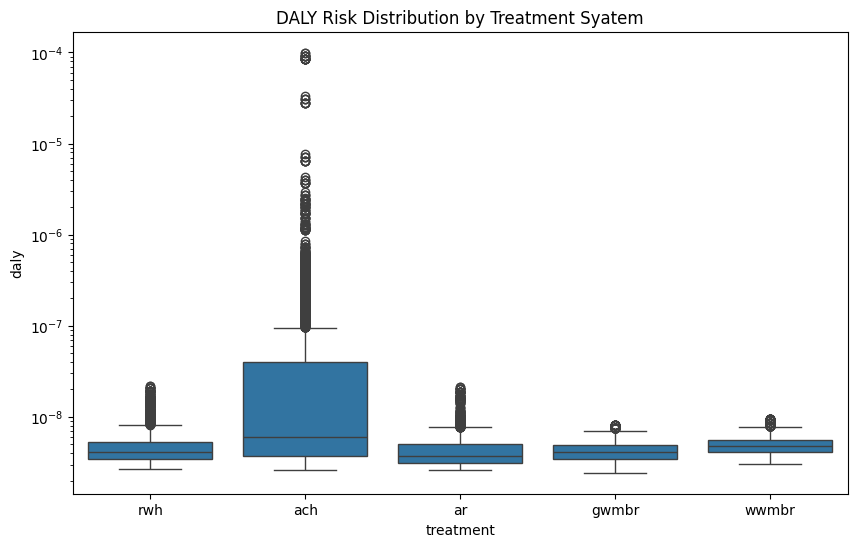

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x="treatment", y="daly", data=df_long)
plt.yscale("log")
plt.title("DALY Risk Distribution by Treatment System")
plt.show()

**Key Takeaways:**

- ACH has the highest DALY values, meaning it carries the most health risk among the five systems.
- RWH, AR, GWMBR, and WWMBR all show very low DALY values, around 1e-8, indicating strong and consistent health protection.
- The three membrane systems (GWMBR, WWMBR) and rainwater (RWH) perform safely and similarly.

***Overall*** RWH, AR, GWMBR, and WWMBR are low-risk systems, while ACH is the least safe in terms of health risk.


## 4. Cost analysis
We compare the average cost ($/gal) for each treatment system.

In [53]:
[c for c in df.columns if "present_value" in c.lower()]

['rwh_net_net_present_value_$/gal',
 'ach_net_net_present_value_$/gal',
 'ar_net_net_present_value_$/gal',
 'gwmbr_net_net_present_value_$/gal',
 'wwmbr_net_net_present_value_$/gal']

In [54]:
# Calculate average present value costs for each treatment
cost_summary = df[[c for c in df.columns if "present_value" in c.lower()]].mean()
cost_summary.index = ["RWH","ACH", "AR", "GWMBR", "WWMBR"]

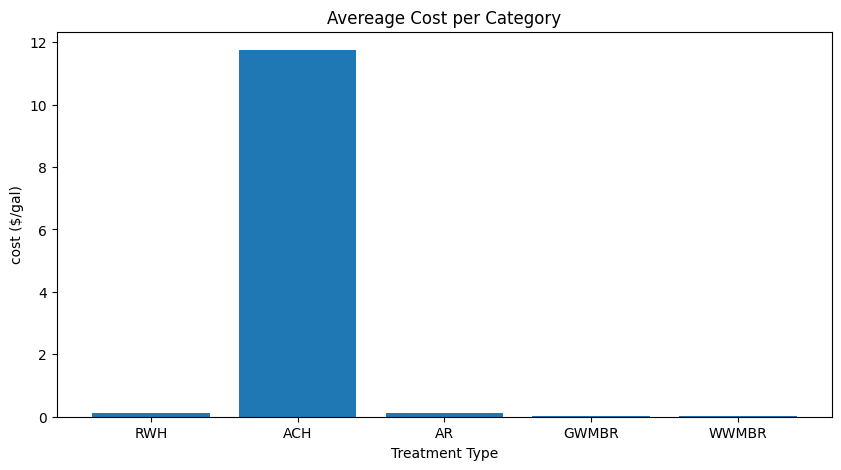

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(cost_summary.index, cost_summary.values)
plt.title("Average Cost per Category")
plt.ylabel("cost ($/gal)")
plt.xlabel("Treatment Type")
plt.show()

This bar chart shows the average cost per treatment system. ACH is significantly more expensive than the other systems, costing around $12 per gallon. All other systems (RWH, AR, GWMBR, WWMBR) have very low costs in comparison, staying close to $0.1 or lower. This means ACH has extremely high operational cost, while the remaining systems are much more cost-efficient.

## 6.Energy Use Analysis
In this section, we examine the energy demand associated with each treatment system.
Energy plays an important role in operational role in operational costs and sustainability.
Identifying which systems consume more or less energy helps us understand their long-termfeasibility.

In [57]:
# Identify columns related to energy demand
energy_cols = [c for c in df.columns if "energy_demand" in c.lower()]
energy_cols

['rwh_net_cumulative_energy_demand_mj/gal',
 'ach_net_cumulative_energy_demand_mj/gal',
 'ar_net_cumulative_energy_demand_mj/gal',
 'gwmbr_net_cumulative_energy_demand_mj/gal',
 'wwmbr_net_cumulative_energy_demand_mj/gal']

In [58]:
#convert energy columns to numeric
df[energy_cols] = df[energy_cols].apply(pd.to_numeric, errors='coerce')

#average energy use 
energy_summary = df[energy_cols].mean()
energy_summary



rwh_net_cumulative_energy_demand_mj/gal      0.049340
ach_net_cumulative_energy_demand_mj/gal      3.789571
ar_net_cumulative_energy_demand_mj/gal       0.043682
gwmbr_net_cumulative_energy_demand_mj/gal    0.042970
wwmbr_net_cumulative_energy_demand_mj/gal    0.046925
dtype: float64

In [59]:
# Set proper index labels for energy summary
energy_summary.index = ["RWH", "ACH", "AR", "GWMBR", "WWMBR"]

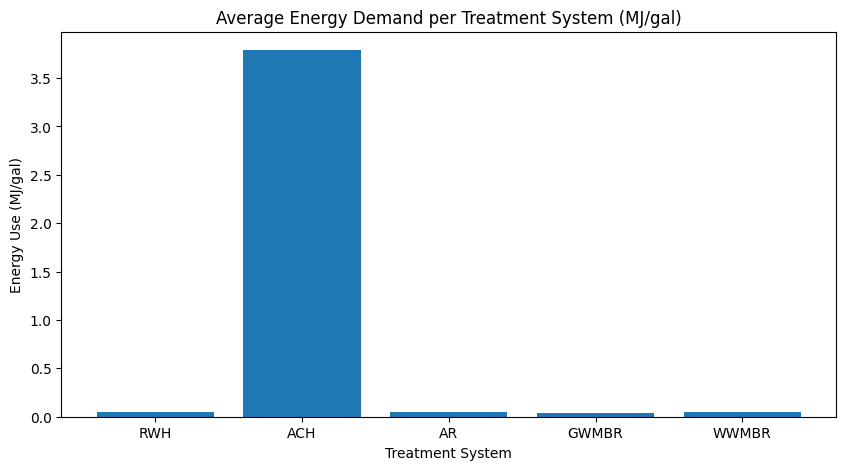

In [60]:
# Plot average energy demand per treatment system
plt.figure(figsize=(10,5))
plt.bar(energy_summary.index, energy_summary.values)
plt.title("Average Energy Demand per Treatment System (MJ/gal)")
plt.ylabel("Energy Use (MJ/gal)")
plt.xlabel("Treatment System")
plt.show()


#### Energy Results
The results show clear differences in energy demand accross systems.
ACH appears to require the highest energy use, which may increase optional cost over time .
In contrast, RWH, AR, GWMBR, WWMBR show lower energy footprints, suggesting better long-term sustainability.

## 7. UV Dose vs DALY Analysis
In this section, we explore whether higher UV doser are assocated with lower DALY values.
UV is a primary disinfection method, and understanding its impace helps evaluate how effective the treatment systems are at reducing health risk.

Because DALY values are extremely small, we apply a log scale for clarity.


In [61]:
[col for col in df.columns if "uv" in col.lower()]

['rainwater_uv_dose_mj/cm2',
 'greywater_uv_dose_mj/cm2',
 'wastewater_uv_dose_mj/cm2']

In [62]:
import seaborn as sns
sns.__version__

'0.13.2'

In [63]:
# 1. Create clean treatment names
df_long["treatment_clean"] = df_long["treatment"].replace({
    "ach_net_daly_daly/gal": "ACH",
    "rwh_net_daly_daly/gal": "RWH",
    "ar_net_daly_daly/gal": "AR (Aerobic Reactor)",
    "gwmbr_net_daly_daly/gal": "Greywater MBR",
    "wwmbr_net_daly_daly/gal": "Wastewater MBR"
})

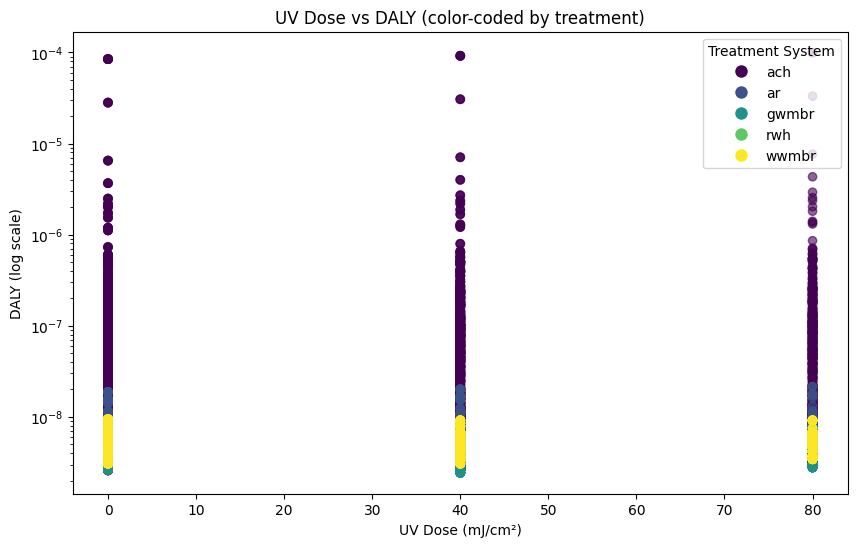

In [64]:
# 2. Map treatment names to colors
treatments = df_long["treatment_clean"].astype("category")
codes = treatments.cat.codes

plt.figure(figsize=(10,6))

scatter = plt.scatter(
    df_long["rainwater_uv_dose_mj/cm2"],
    df_long["daly"],
    alpha=0.6,
    c=codes,
    cmap="viridis"
)

plt.yscale("log")
plt.title("UV Dose vs DALY (color-coded by treatment)")
plt.xlabel("UV Dose (mJ/cm²)")
plt.ylabel("DALY (log scale)")

# 3.  legend from treatment_clean (NOT treatment)
unique_treatments = treatments.cat.categories
colors = scatter.cmap(scatter.norm(range(len(unique_treatments))))

legend_handles = [
    plt.Line2D(
        [0], [0], marker='o', color='w',
        markerfacecolor=colors[i], markersize=10,
        label=unique_treatments[i]
    )
    for i in range(len(unique_treatments))
]

plt.legend(handles=legend_handles, title="Treatment System", loc="upper right")
plt.show()



The plot shows that DALY values remain extremely low (around 10⁻⁸ to 10⁻⁹) across all UV doses (0, 40, 80 mJ/cm²), meaning health risk stays very low regardless of dose. The treatment system has a larger influence on DALY than the UV dose itself. ACH consistently has the lowest DALY values, while AR shows slightly higher risks than the other systems. Overall, UV dose does not significantly change health risk in this dataset.


## 8.Environmental Impact Data Extraction & Reshaping

In this section, we evaluate and compare the environmental impact of the five water treatment systems:
Each system has multiple environmental indicators.
All metrics are scaled between 0 and 1 (normalised) so they can be compared on the same plot.

In [65]:
env_rows = []
for col in df_long.columns:

    # Identify environmental columns
    if "_net_" in col and (
        "global_warming" in col or
        "cumulative_energy" in col or
        "water_consumption" in col or
        "fossil_fuel" in col or
        "water_scarcity" in col
    ):
        # Split into treatment + metric names
        treatment = col.split("_net_")[0]          # ach, ar, gwmbr, wwmbr
        metric = col.split("_net_")[1]             # global_warming_potential_kg_co2_eq/gal
        
        # Add rows
        env_rows.append(pd.DataFrame({
            "treatment": treatment,
            "metric": metric,
            "value": df_long[col]
        }))
        
# Combine into long format
env_long = pd.concat(env_rows, ignore_index=True)


In [66]:
# Pivot the long dataframe to have treatments as rows and metrics as columns
env_pivot = env_long.pivot_table(
    index="treatment",
    columns="metric",
    values="value",
    aggfunc="mean"
)

env_pivot


metric,cumulative_energy_demand_mj/gal,fossil_fuel_depletion_kg_oil_eq./gal,global_warming_potential_kg_co2_eq/gal,water_consumption_liter_h2o/gal,water_scarcity_liters_h2o_deprivation/gal
treatment,,,,,
ach,3.789571,0.090053,0.126888,0.476799,4.335688
ar,0.043682,0.000955,0.001966,0.013462,0.125331
gwmbr,0.042970,0.000704,0.002822,0.018676,0.182271
rwh,0.049340,0.001089,0.002158,0.014208,0.132089
wwmbr,0.046925,0.000749,0.003443,0.021065,0.205843


In [67]:
label_map = {
    "cumulative_energy_demand_mj/gal": "Energy Demand",
    "fossil_fuel_depletion_kg_oil_eq./gal": "Fossil Fuel",
    "global_warming_potential_kg_co2_eq/gal": "GWP (CO2-eq)",
    "water_consumption_liter_h2o/gal": "Water Use",
    "water_scarcity_liters_h2o_deprivation/gal": "Water Scarcity"
}

env_pivot = env_pivot.rename(columns=label_map)


In [68]:
# Normalize the environmental metrics using Min-Max scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
env_scaled = pd.DataFrame(
    scaler.fit_transform(env_pivot),
    index=env_pivot.index,
    columns=env_pivot.columns
)

env_scaled


metric,Energy Demand,Fossil Fuel,GWP (CO2-eq),Water Use,Water Scarcity
treatment,,,,,
ach,1.000000,1.000000,1.000000,1.000000,1.000000
ar,0.000190,0.002809,0.000000,0.000000,0.000000
gwmbr,0.000000,0.000000,0.006851,0.011252,0.013524
rwh,0.001700,0.004306,0.001534,0.001609,0.001605
wwmbr,0.001056,0.000496,0.011827,0.016409,0.019122


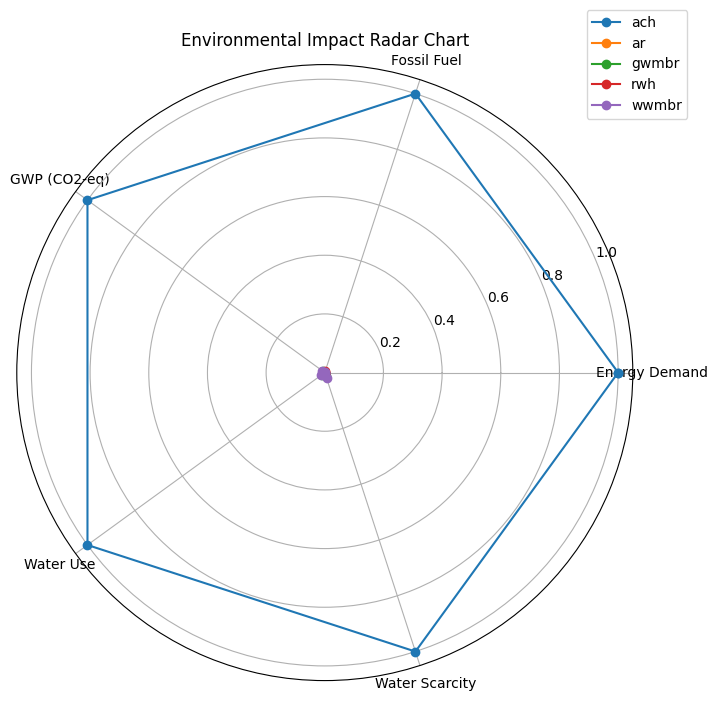

In [69]:
# Create a radar chart to visualize the environmental metrics per treatment
import numpy as np
import matplotlib.pyplot as plt

labels = env_scaled.columns
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

plt.figure(figsize=(8,8))

for treatment in env_scaled.index:
    values = env_scaled.loc[treatment].tolist()
    values += values[:1]
    plt.polar(angles, values, marker='o', label=treatment)

plt.title("Environmental Impact Radar Chart")
plt.xticks(angles[:-1], labels, fontsize=10)
plt.legend(bbox_to_anchor=(1.1, 1.1))
plt.show()


### Interpretation: Environmental Impact Radar Chart (All Systems)

This radar chart displays environmental burdens across five metrics:
- Energy Demand  
- Fossil Fuel Use  
- Global Warming Potential  
- Water Use  
- Water Scarcity  

**ACH** dominates the chart and appears at the outer edge across all categories because its environmental impacts are much higher than the other systems.  
The remaining four systems appear very close to the center due to having much lower impacts.

**Conclusion:** ACH is an extreme environmental outlier, so a separate visualization excluding ACH is needed.


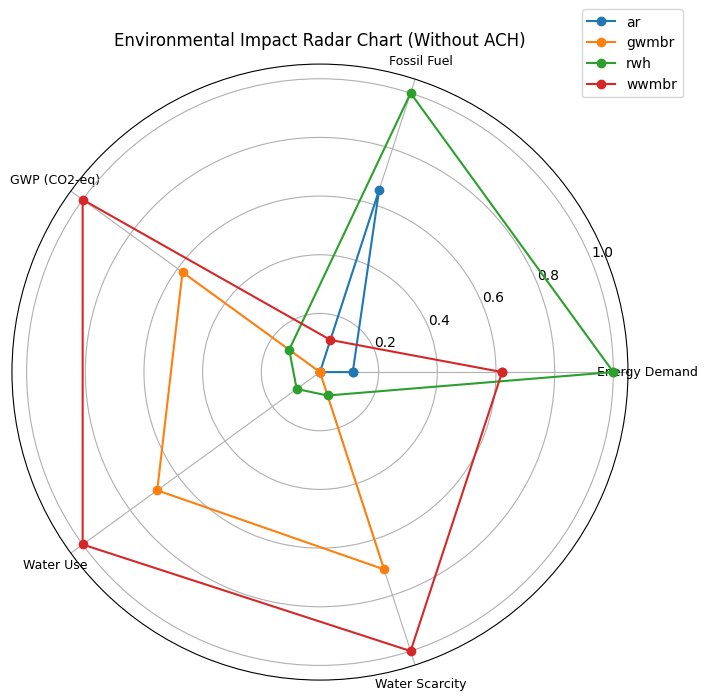

In [70]:
# Remove ACH from the environmental pivot table
env_no_ach = env_pivot.drop("ach")

# Scale again without ACH so values spread out
scaler = MinMaxScaler()
env_scaled_no_ach = pd.DataFrame(
    scaler.fit_transform(env_no_ach),
    index=env_no_ach.index,
    columns=env_no_ach.columns
)

# Radar chart without ACH
labels = env_scaled_no_ach.columns
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

plt.figure(figsize=(8,8))

for treatment in env_scaled_no_ach.index:
    values = env_scaled_no_ach.loc[treatment].tolist()
    values += values[:1]
    plt.polar(angles, values, marker='o', label=treatment)

plt.title("Environmental Impact Radar Chart (Without ACH)")
plt.xticks(angles[:-1], labels, fontsize=9)
plt.legend(bbox_to_anchor=(1.1, 1.1))
plt.show()


### Environmental Impact Radar Chart (Without ACH)

Removing ACH makes the differences among the remaining systems visible:

- **RWH** = lowest environmental impact overall  
- **AR** = moderate environmental performance  
- **GWMBR** = highest energy demand & fossil fuel use  
- **WWMBR** = highest GWP, water use, and water scarcity  

**Conclusion:** RWH is the most environmentally sustainable system.  
GWMBR and WWMBR show higher impacts but in different categories.


## 8.Cost–Health Tradeoff Analysis (DALY vs Cost)


In [71]:
# 1. Environmental score (mean of 5 environmental metrics per treatment)
env_score = env_pivot.mean(axis=1)

# 2. DALY columns (wide format)
daly_cols = [c for c in df.columns if "net_daly" in c]

daly_summary = df[daly_cols].mean()  
daly_summary.index = ["ach","ar","gwmbr","rwh","wwmbr"]  # ensure proper order

# 3. Cost columns (wide format)
cost_cols = [c for c in df.columns if "net_present_value" in c]

cost_summary = df[cost_cols].mean()
cost_summary.index = ["ach","ar","gwmbr","rwh","wwmbr"]

# 4. Build final Tradeoff DataFrame
tradeoff_df = pd.DataFrame({
    "treatment": ["ach","ar","gwmbr","rwh","wwmbr"],
    "environment": env_score.values,
    "daly": daly_summary.values,
    "cost": cost_summary.values
})

tradeoff_df


,treatment,environment,daly,cost
0,ach,1.763800,4.699069e-09,0.124122
1,ar,0.037079,2.452399e-07,11.744942
2,gwmbr,0.049488,4.306730e-09,0.110933
3,rwh,0.039777,4.169821e-09,0.028492
4,wwmbr,0.055605,4.950854e-09,0.034176


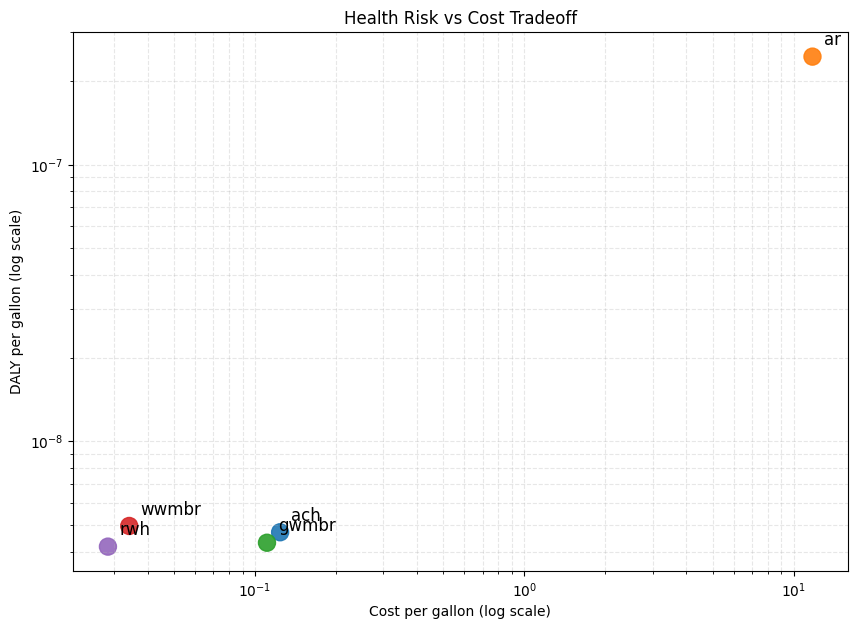

In [72]:
# Plotting the tradeoff between DALY and Cost
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,7))

# scatter
plt.scatter(
    tradeoff_df["cost"],
    tradeoff_df["daly"],
    s=150,
    c=["#1f77b4","#ff7f0e","#2ca02c","#9467bd","#d62728"],
    alpha=0.9
)

# annotate
for i, row in tradeoff_df.iterrows():
    plt.text(
        row["cost"]*1.1,
        row["daly"]*1.1,
        row["treatment"],
        fontsize=12
    )

plt.xscale("log")
plt.yscale("log")

plt.xlabel("Cost per gallon (log scale)")
plt.ylabel("DALY per gallon (log scale)")
plt.title("Health Risk vs Cost Tradeoff")

plt.grid(True, which="both", linestyle="--", alpha=0.3)

plt.show()


This plot compares average cost per gallon (x-axis, log scale) with DALY health risk (y-axis, log scale) for each treatment system.

AR has both the highest cost and the highest DALY risk, making it the least efficient option.

ACH, GWMBR, RWH, and WWMBR all have very low DALY risk and low cost, forming the low-risk/low-cost cluster.

RWH and WWMBR show the lowest overall DALY risk.

ACH costs slightly more but still has low risk.

**Overall**: AR performs poorly, while the remaining systems offer safer and more affordable performance.